<a href="https://colab.research.google.com/github/SreeBhargaviM/Neural-networks-with-Tensorflow/blob/master/Multi_class_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)
21.0


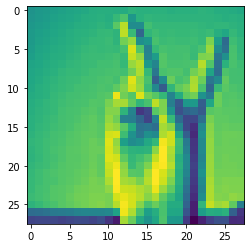

In [ ]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
        all_lines = training_file.readlines()[1:] #remove header
        length = len(all_lines)
        labels = np.zeros(length)
        images = np.zeros((length, 28, 28))
        for idx, line in enumerate(all_lines):
            line = line.split(',')
            if not line:
                continue
            #add the label
            labels[idx] = int(line[0])
            #add the image
            image = np.asarray(line[1:], dtype=np.float32)
            image = np.array_split(image, 28)
            images[idx, :, :] = image
      # Your code ends here
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)
import matplotlib.pyplot as plt
plt.imshow(testing_images[12])
print(testing_labels[12])
# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

In [ ]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images =  np.expand_dims(training_images, axis=3)
testing_images =  np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255.,
                    #rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    #horizontal_flip=True
                    fill_mode='nearest'
                                  )

validation_datagen = ImageDataGenerator(rescale=1./255.)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [ ]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
train_generator = train_datagen.flow(training_images, training_labels,batch_size = 20)     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  validation_datagen.flow( testing_images, testing_labels,batch_size = 20)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(512, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(25, activation='softmax')
])

# Compile Model. 
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the Model
history = model.fit_generator(train_generator, epochs=2, steps_per_epoch=1000, validation_data = validation_generator, validation_steps=5)

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/2
1000/1000 [==============================] - 78s 78ms/step - loss: 2.1854 - accuracy: 0.3280 - val_loss: 0.9274 - val_accuracy: 0.6600
Epoch 2/2
1000/1000 [==============================] - 76s 76ms/step - loss: 0.7956 - accuracy: 0.7383 - val_loss: 0.6312 - val_accuracy: 0.8200


[115.97604724141519, 0.6823759]

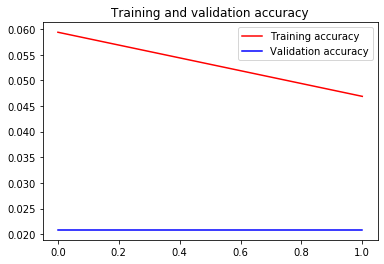

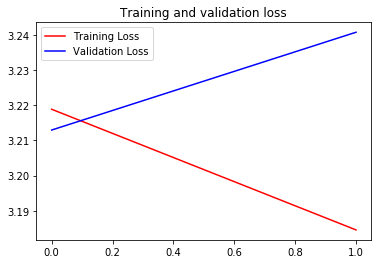

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()